In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [36]:
# Summary statistics for all columns
summary_stats = df.describe(include='all').transpose()
print(summary_stats)


             count unique                  top freq       mean         std  \
PassengerId  891.0    NaN                  NaN  NaN      446.0  257.353842   
Survived     891.0    NaN                  NaN  NaN   0.383838    0.486592   
Pclass       891.0    NaN                  NaN  NaN   2.308642    0.836071   
Name           891    891  Dooley, Mr. Patrick    1        NaN         NaN   
Sex            891      2                 male  577        NaN         NaN   
Age          714.0    NaN                  NaN  NaN  29.699118   14.526497   
SibSp        891.0    NaN                  NaN  NaN   0.523008    1.102743   
Parch        891.0    NaN                  NaN  NaN   0.381594    0.806057   
Ticket         891    681               347082    7        NaN         NaN   
Fare         891.0    NaN                  NaN  NaN  32.204208   49.693429   
Embarked       889      3                    S  644        NaN         NaN   

              min     25%      50%    75%       max  
Passenger

In [37]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [48]:
df['Age'].fillna(df['Age'].median(), inplace=True)
print(np.unique(df["Age"]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 70 71 74 80]


<ipython-input-48-36fdee107b9b>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [45]:
df['Age'] = df['Age'].round().astype('Int64') # Use Int64 to handle NaN
print(df.dtypes['Age'])

Int64


In [49]:
df['Embarked'] = df['Embarked'].replace('nan', np.nan)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].astype('category')
print(df['Embarked'].unique())


['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']


In [42]:
df = pd.read_csv("Titanic-Dataset.csv")
df.drop('Cabin', axis=1, inplace=True)

In [50]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
print(df.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object


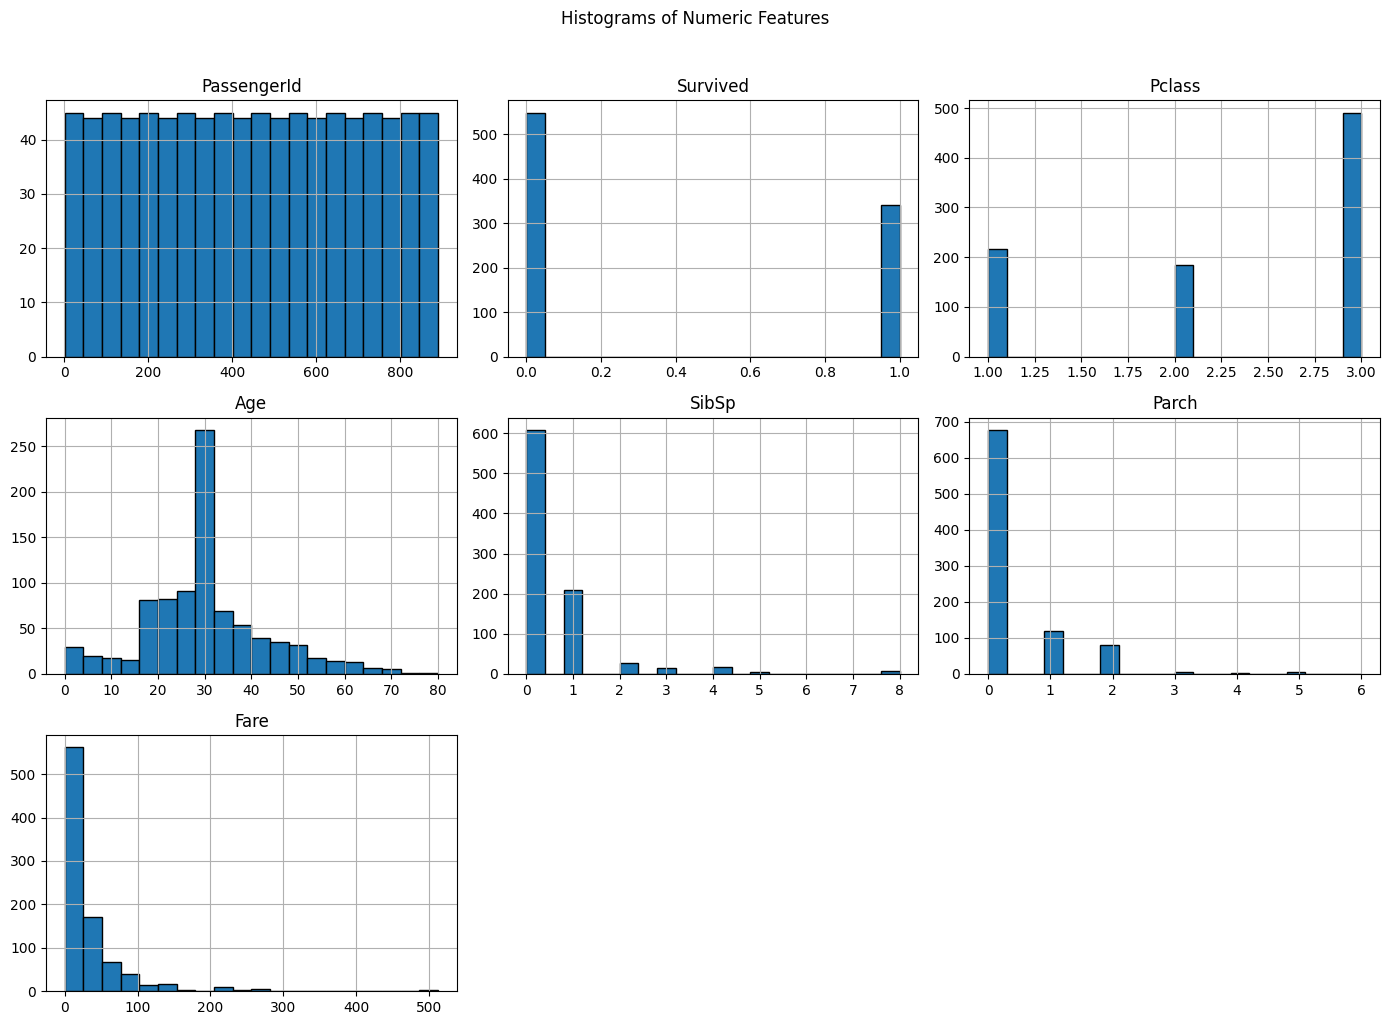

In [25]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()


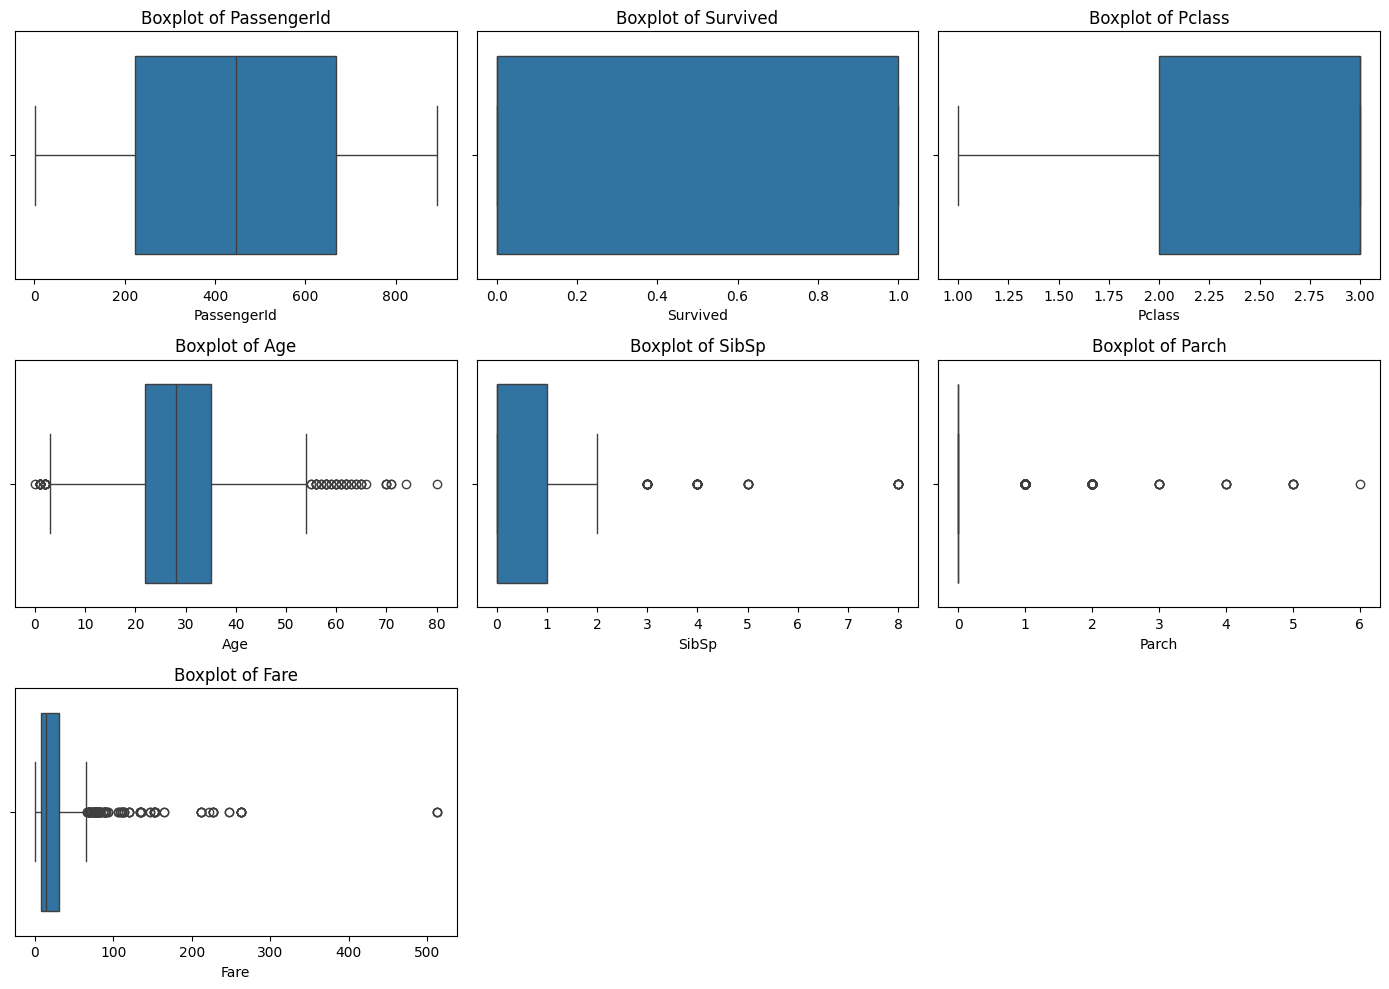

In [23]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


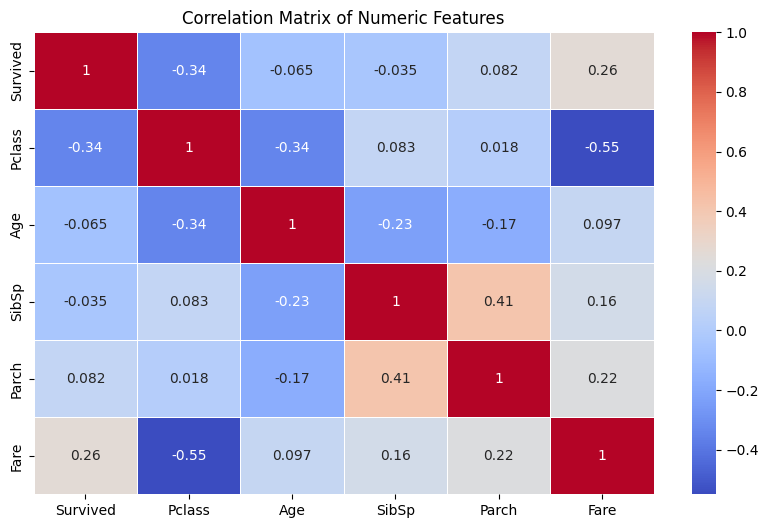

In [24]:
# Subset of numeric features for correlation
corr_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


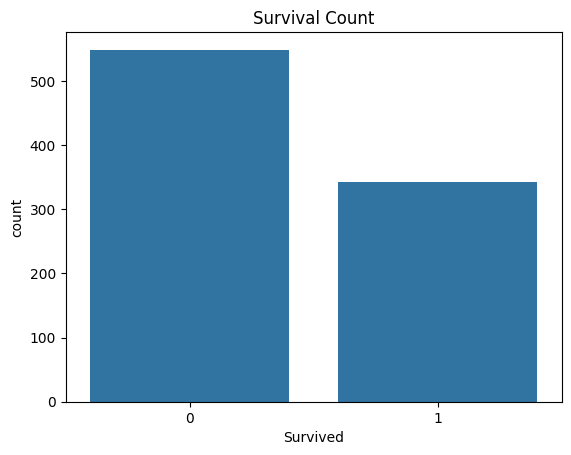

In [13]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

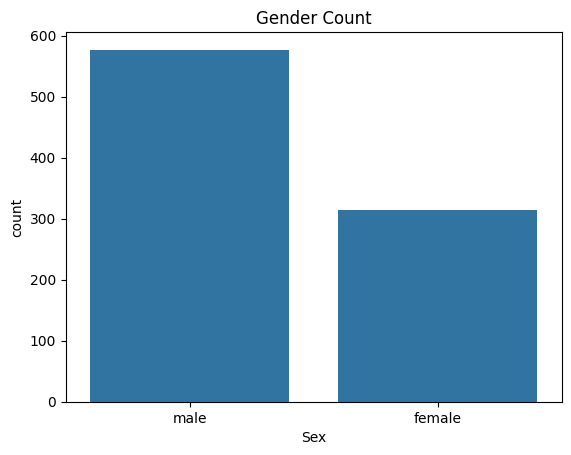

In [14]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')
plt.show()

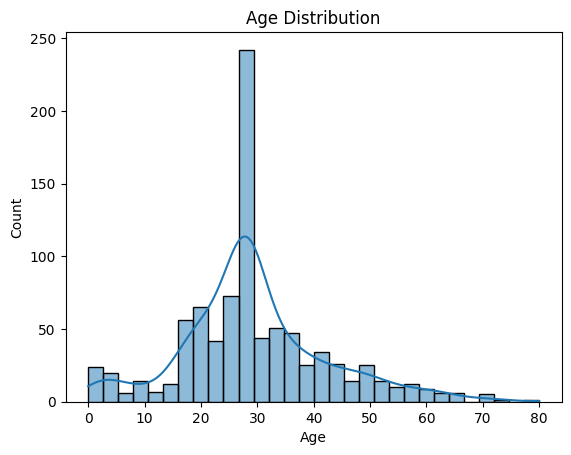

In [15]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

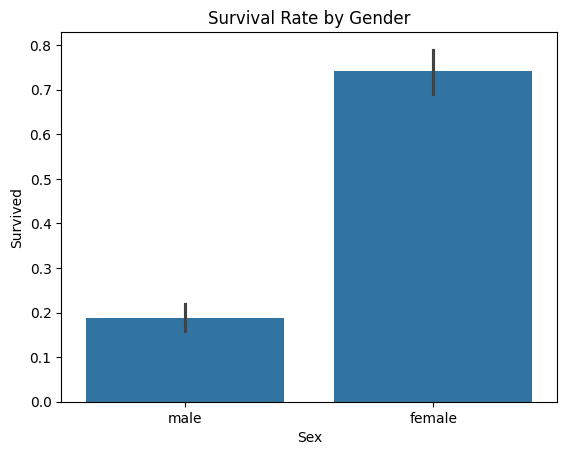

In [16]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

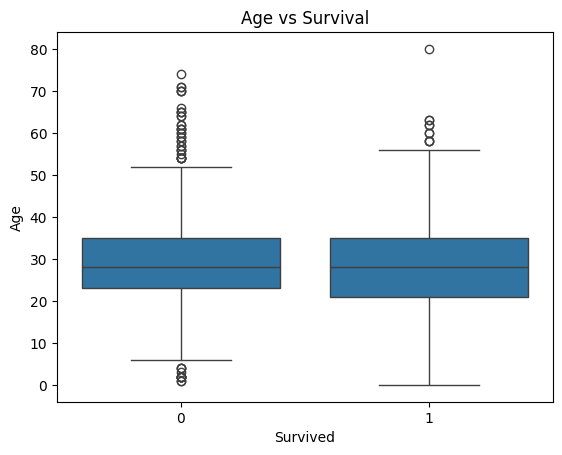

In [17]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

In [18]:
import plotly.express as px

# Interactive Survival vs Age & Sex
fig = px.histogram(df, x='Age', color='Survived', nbins=30,
                   facet_col='Sex', title='Age Distribution by Survival and Gender')
fig.show()

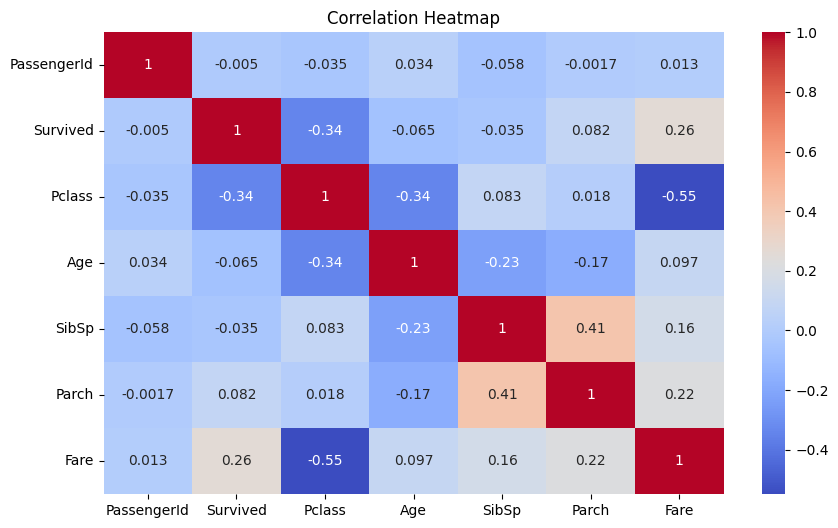

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') # Select only numerical features for correlation
plt.title('Correlation Heatmap')
plt.show()